# Classification

#### **Dataset**  
In this homework, we will use the Bank Marketing dataset.

In [1]:
!wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip

--2024-10-15 17:42:28--  https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bank+marketing.zip’

bank+marketing.zip      [ <=>                ] 999.85K  --.-KB/s    in 0.07s   

2024-10-15 17:42:29 (14.3 MB/s) - ‘bank+marketing.zip’ saved [1023843]



In [2]:
#Importing needed libraries
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
!unzip bank+marketing.zip

Archive:  bank+marketing.zip
 extracting: bank.zip                
 extracting: bank-additional.zip     


In [4]:
# Loading the dataset

file_inside_zip = "bank-full.csv"

# Open the zip file
with zipfile.ZipFile('bank.zip', 'r') as zip_ref:
  # Extract the CSV file to a temporary location
  zip_ref.extract(file_inside_zip)

df = pd.read_csv('bank-full.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
df.columns.str.lower().str.replace(' ', '')

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [7]:
df = df[['age', 'job', 'marital', 'education', 'balance', 'housing',
       'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y']]

In [8]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
balance,0
housing,0
contact,0
day,0
month,0
duration,0


**Question 1**  
What is the most frequent observation (mode) for the column education?
- unknown
- primary
- secondary
- tertiary

In [9]:
print(f"The most frequent observation for the education column is - {df.education.mode()[0]}")

The most frequent observation for the education column is - secondary


**Question 2**  
Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features.

What are the two features that have the biggest correlation?

- age and balance
- day and campaign
- day and pdays
- pdays and previous

In [10]:
# Create the correlation matrix for the numerical features.
numerical_df = df.select_dtypes(include=['number'])
corr_matrix = numerical_df.corr()

corr_matrix

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


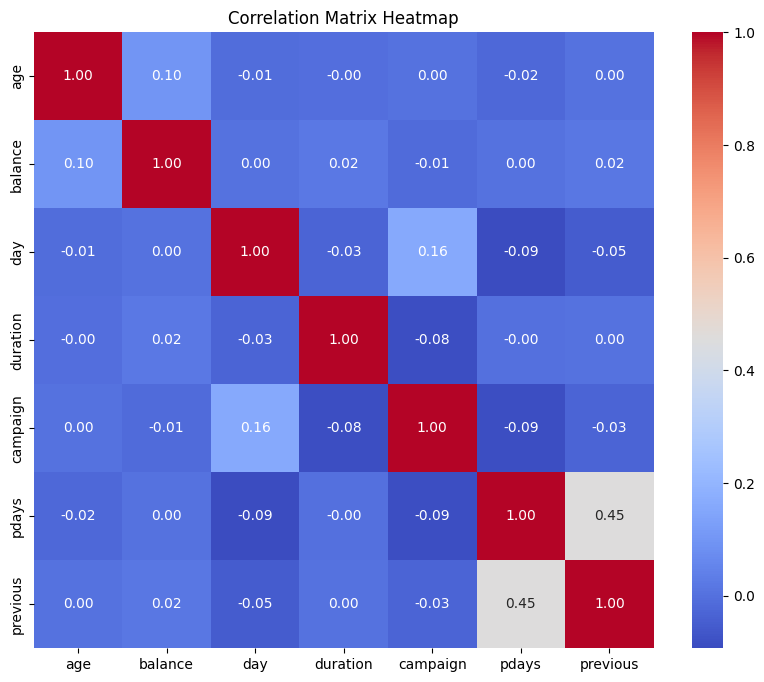

In [11]:
# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [12]:
top_features = list(corr_matrix.index[5:7])
print(f"The two features with the biggest correlation are {top_features[0]} and {top_features[1]} \
with a correlation of {corr_matrix.loc[top_features[0], top_features[1]]}")


The two features with the biggest correlation are pdays and previous with a correlation of 0.4548196354805043


#### **Target encoding**
Now we want to encode the y variable.  
- Let's replace the values yes/no with 1/0

In [13]:
df.y = (df.y == 'yes').astype(int)

#### **Split the data**
- Split your data in train/val/test sets with 60%/20%/20% distribution.
Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
- Make sure that the target value y is not in your dataframe.

In [14]:
# Split your data in train/val/test sets with 60%/20%/20% distribution
X = df.drop(columns=['y'])
y = df.y

# Split the data into train and test sets (80% train, 20% test)
X_full_train, X_test, y_full_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the train data further into train and validation sets (75% train, 25% validation)
X_train, X_val, y_train, y_val = train_test_split(X_full_train, y_full_train, test_size=0.25, random_state=42)

# Split the train data further into train and validation sets (75% train, 25% validation)
train_data, val_data = train_test_split(X_train, test_size=0.25, random_state=42)

len(X), len(X_full_train), len(X_train), len(X_val), len(X_test)

(45211, 36168, 27126, 9042, 9043)

**Question 3**
- Calculate the mutual information score between y and other categorical variables in the dataset. Use the training set only.
- Round the scores to 2 decimals using round(score, 2).

In [15]:
df.select_dtypes(include=['object']).columns

Index(['job', 'marital', 'education', 'housing', 'contact', 'month',
       'poutcome'],
      dtype='object')

In [16]:
#train_df = X_train.copy()
#train_df['y'] = y_train

cat = X_train.select_dtypes(include=['object']).columns

def mutual_info_churn_score(series):
    return mutual_info_score(series, y_train)

mUtual_info = X_train[cat].apply(mutual_info_churn_score).round(2)
mUtual_info

,0
job,0.01
marital,0.00
education,0.00
housing,0.01
contact,0.01
month,0.03
poutcome,0.03


**Question 4**  
Now let's train a logistic regression.  
*Remember that we have several categorical variables in the dataset*. Include them using one-hot encoding.  
- Fit the model on the training dataset.
- To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:  
`model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)`
- Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

In [17]:
X_train.shape, X_val.shape

((27126, 14), (9042, 14))

In [18]:
X_train_df = X_train.copy()
X_val_df = X_val.copy()

In [19]:
# One-hot encoding the categorical variabes
#num = X_train.select_dtypes(include=['number']).columns
#cat = X_train.select_dtypes(include=['object']).columns
cols = X_train.columns
X_dict = X_train[cols].to_dict(orient='records')
val_dict = X_val[cols].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
dv.fit(X_dict)
X_train = dv.transform(X_dict)
X_val = dv.transform(val_dict)

In [20]:
X_train.shape, X_val.shape

((27126, 47), (9042, 47))

In [21]:
# Training the model
lr_model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [22]:
# Model accuracy on validation set.
y_pred = lr_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy on the validation dataset: {accuracy:.2f}")

Accuracy on the validation dataset: 0.90


**Question 5**  
Let's find the least useful feature using the feature elimination technique.
- Train a model with all these features (using the same parameters as in Q4).
- Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
- For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

In [23]:
original_accuracy = accuracy
cols = cols.tolist()
cols_copy = cols.copy()#.tolist()

check_list = ['age', 'balance', 'marital', 'previous']
accuracy_diff = {}

for col in cols:
    cols_copy.remove(col)
    X_dict = X_train_df[cols_copy].to_dict(orient='records')
    val_dict = X_val_df[cols_copy].to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    dv.fit(X_dict)
    X_train_fe = dv.transform(X_dict)
    X_val_fe = dv.transform(val_dict)
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train_fe, y_train)
    y_pred = model.predict(X_val_fe)
    accuracy = accuracy_score(y_val, y_pred)
    accuracy_diff[col] = original_accuracy - accuracy
    print(f"Accuracy without {col}: {accuracy:.4f}..., Accuracy difference {accuracy - original_accuracy}")
    cols_copy = cols.copy()

print("*" * 50)

Accuracy without age: 0.9013..., Accuracy difference 0.00044238000442387015
Accuracy without job: 0.9011..., Accuracy difference 0.0002211900022119906
Accuracy without marital: 0.9009..., Accuracy difference 0.0
Accuracy without education: 0.9009..., Accuracy difference 0.0
Accuracy without balance: 0.9010..., Accuracy difference 0.0001105950011059953
Accuracy without housing: 0.9011..., Accuracy difference 0.0002211900022119906
Accuracy without contact: 0.9005..., Accuracy difference -0.00044238000442375913
Accuracy without day: 0.9013..., Accuracy difference 0.00044238000442387015
Accuracy without month: 0.8998..., Accuracy difference -0.0011059500110593978
Accuracy without duration: 0.8897..., Accuracy difference -0.011170095111700862
Accuracy without campaign: 0.9002..., Accuracy difference -0.0006635700066356387
Accuracy without pdays: 0.9009..., Accuracy difference 0.0
Accuracy without previous: 0.9009..., Accuracy difference 0.0
Accuracy without poutcome: 0.8934..., Accuracy dif

In [24]:
for name in check_list:
    print(f"Accuracy difference for {name} is {accuracy_diff[name]}")

Accuracy difference for age is -0.00044238000442387015
Accuracy difference for balance is -0.0001105950011059953
Accuracy difference for marital is 0.0
Accuracy difference for previous is 0.0


**Question 6**  
Now let's train a regularized logistic regression.
- Let's try the following values of the parameter C: [0.01, 0.1, 1, 10, 100].
- Train models using all the features as in Q4.
- Calculate the accuracy on the validation dataset and round it to 3 decimal digits.

In [25]:

c_values = [0.01, 0.1, 1, 10, 100]
best_acc = 0
c_parm = None

for r in c_values:
    model = LogisticRegression(solver='liblinear', C=r, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    print(f"Accuracy with C={r}: {accuracy:.3f}")

    if accuracy > best_acc:
        best_acc = accuracy
        c_param = r


print("*" * 50)
print(f"Best accuracy is {best_acc}, its C value is {c_param}")

Accuracy with C=0.01: 0.898
Accuracy with C=0.1: 0.901
Accuracy with C=1: 0.901
Accuracy with C=10: 0.901
Accuracy with C=100: 0.901
**************************************************
Best accuracy is 0.9009068790090687, its C value is 1
